# Exploration of model performance

Testing the performance of the model to predict different parts of a full-text paper (start, middle, end)

In [1]:
import pandas as pd
import numpy as np

# Load and process data

In [2]:
# Load predictions from pokay data trained model
model_results = pd.read_csv("test_predictions_model_1.csv")

# Load predictions from pokay + retrain data trained model
model_v2_results = pd.read_csv("test_predictions_model_v2.csv")

In [3]:
# Categorize the text chunks based on it's position in the paper
def categorize_chunks(group):
    n = len(group)
    categories = []

    for i in range(n):
        if i == 0:
            categories.append('beginning')
        elif i == 1:
            categories.append('beginning')
        elif i == n-1:
            categories.append('end')
        else:
            categories.append('middle')

    return pd.Series(categories, index = group.index)

In [4]:
# Create another column to describe whether the prediction was correct
def process_data(df):
    # See if prediction is correct
    df["correct"] = df["prediction"] == df["label"]

    # Label papers in data
    paper_labels = []
    current_paper = 1
    
    for i in range(len(df)):
        # Increase paper count if current position is smaller than previous position (indicates new paper)
        if i > 0 and df.loc[i, 'position'] <= df.loc[i-1, 'position']:
            current_paper += 1
        paper_labels.append(current_paper)

    df['paper'] = paper_labels

    # Categorize text chunks
    df['category'] = df.groupby('paper').apply(categorize_chunks).reset_index(level=0, drop=True)
    
    return df

In [5]:
# Process papers
model_results = process_data(model_results)

model_v2_results = process_data(model_v2_results)

# Compute metrics

In [8]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [7]:
def compute_metrics(df):
    labels = df["label"]
    preds = df["prediction"]
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [9]:
# Performance metrics for beginning
compute_metrics(model_results[model_results["category"] == "beginning"])

{'accuracy': 0.6666666666666666,
 'f1': 0.7058823529411764,
 'precision': 0.6,
 'recall': 0.8571428571428571}

In [10]:
# Performance metrics for middle
compute_metrics(model_results[model_results["category"] == "middle"])

{'accuracy': 0.6699029126213593,
 'f1': 0.6730769230769229,
 'precision': 0.5147058823529411,
 'recall': 0.9722222222222222}

In [11]:
# Performance metrics for end
compute_metrics(model_results[model_results["category"] == "end"])

{'accuracy': 0.42857142857142855,
 'f1': 0.5,
 'precision': 0.3333333333333333,
 'recall': 1.0}

In [12]:
# Performance metrics for beginning
compute_metrics(model_v2_results[model_v2_results["category"] == "beginning"])

{'accuracy': 0.7333333333333333,
 'f1': 0.7777777777777778,
 'precision': 0.6363636363636364,
 'recall': 1.0}

In [13]:
# Performance metrics for middle
compute_metrics(model_v2_results[model_v2_results["category"] == "middle"])

{'accuracy': 0.6893203883495146,
 'f1': 0.6862745098039216,
 'precision': 0.5303030303030303,
 'recall': 0.9722222222222222}

In [16]:
# Performance metrics for end
compute_metrics(model_v2_results[model_v2_results["category"] == "end"])

{'accuracy': 0.42857142857142855,
 'f1': 0.5,
 'precision': 0.3333333333333333,
 'recall': 1.0}

# Visualize results

In [23]:
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-du73bhag because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [21]:
# Calculate accuracy for each category
def calculate_accuracy(group):
    return np.mean(group['label'] == group['prediction'])

accuracy_by_category = model_results.groupby('category').apply(calculate_accuracy).reset_index(name='Accuracy')
accuracy_by_category_v2 = model_v2_results.groupby('category').apply(calculate_accuracy).reset_index(name='Accuracy')

print(accuracy_by_category)

    category  Accuracy
0  beginning  0.666667
1        end  0.428571
2     middle  0.669903


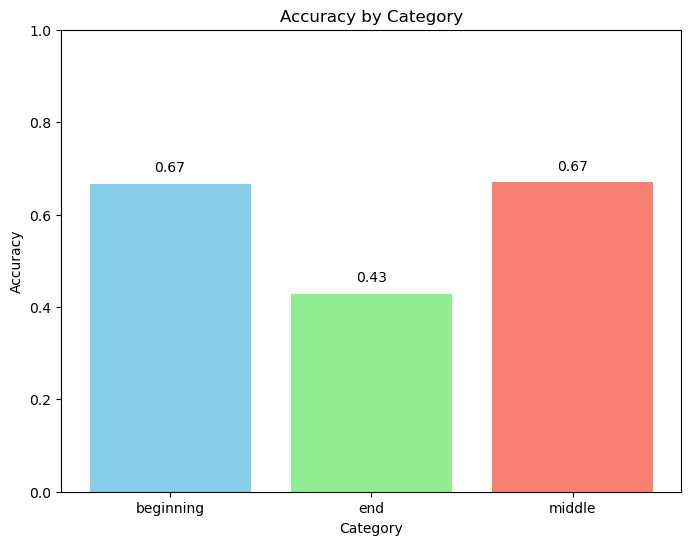

In [24]:
# Plot accuracy by category
plt.figure(figsize=(8, 6))
plt.bar(accuracy_by_category['category'], accuracy_by_category['Accuracy'], color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.title('Accuracy by Category')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
for i, v in enumerate(accuracy_by_category['Accuracy']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()

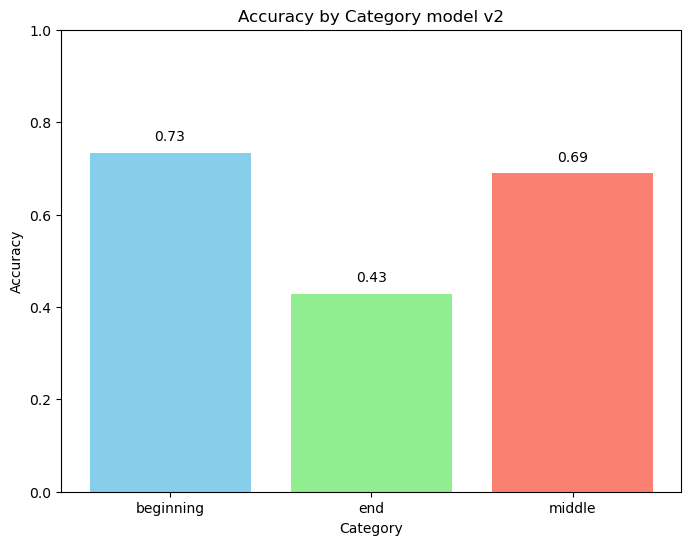

In [25]:
# Plot accuracy by category
plt.figure(figsize=(8, 6))
plt.bar(accuracy_by_category_v2['category'], accuracy_by_category_v2['Accuracy'], color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.title('Accuracy by Category model v2')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
for i, v in enumerate(accuracy_by_category_v2['Accuracy']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()